In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms


class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=100, out_channels=1024, stride=1, kernel_size=4, padding=0, bias=False),
            nn.BatchNorm2d(num_features=1024),
            nn.ReLU(inplace=True), )

        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=1024, out_channels=512, stride=2, kernel_size=4, padding=1, bias=False),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(inplace=True), )
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512, out_channels=256, stride=2, kernel_size=4, padding=1, bias=False),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True), )
        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=128, stride=2, kernel_size=4, padding=1, bias=False),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True), )
        self.layer5 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=3, stride=2, kernel_size=4, padding=1, bias=False),
            nn.Tanh())

        # self.fc1 = torch.nn.Linear(512, 1024)
        # self.ac5 = torch.nn.LeakyReLU()
        # self.fc2 = torch.nn.Linear(1024, 2048)
        # self.ac6 = torch.nn.LeakyReLU()
        # self.fc3 = torch.nn.Linear(2048, 3 * 64 * 64)
        # self.ac_end = torch.nn.Sigmoid()

    def forward(self, x):
        x = x.reshape((x.shape[0], x.shape[1], 1, 1))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(-1, 3, 64, 64)
        # x = self.fc1(x)
        # x = self.ac5(x)
        # x = self.fc2(x)
        # x = self.ac6(x)
        # x = self.fc3(x)
        # x = self.ac_end(x)
        # x = x.view(-1, 3, 64, 64)
        return x




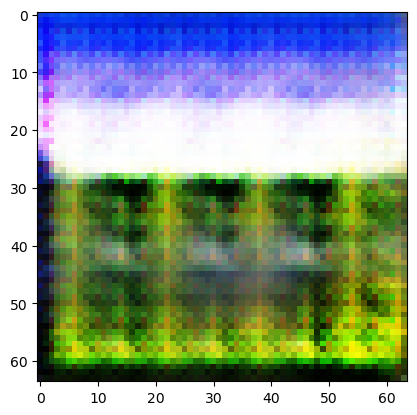

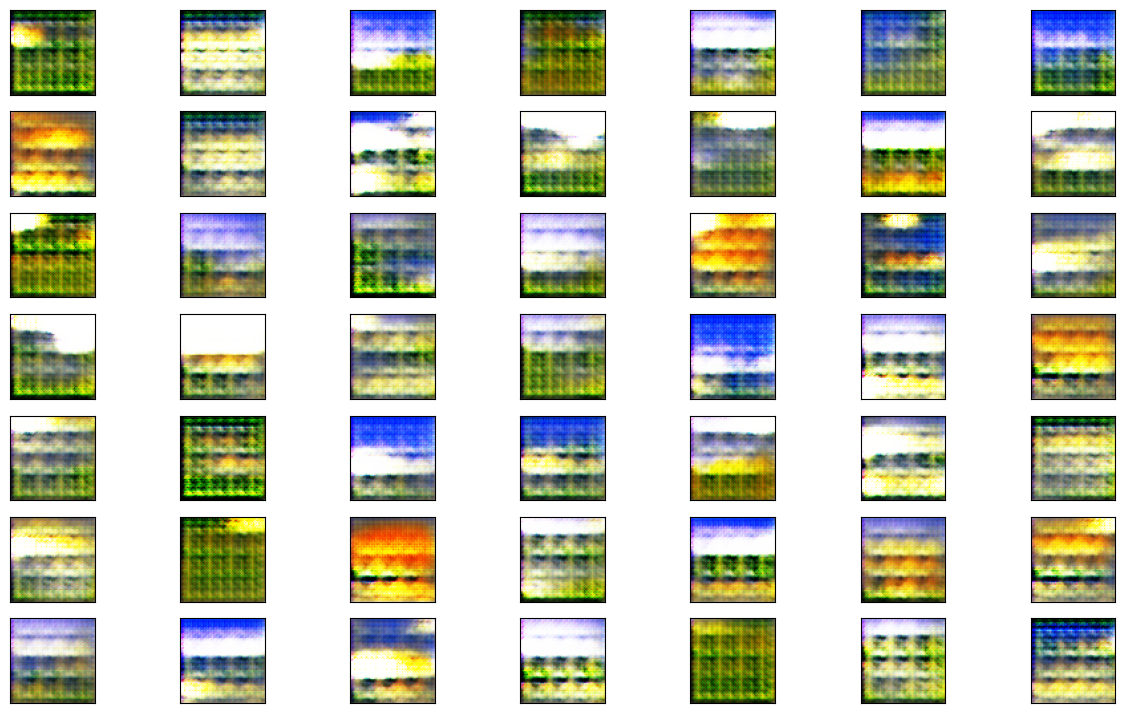

In [62]:
model = torch.load('./models_weights/Generator_epoch_233.pth', map_location='cpu')
model.eval()
img = (((model((torch.rand(1, 100) - 0.5) / 0.5)[0] + 1) / 2).clamp(0, 1)).detach().numpy().transpose(1, 2, 0)
plt.imshow(img)
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(15, 9),  #Размер вывода
                         subplot_kw={'xticks': [], 'yticks': []})
img_indx = 0
for i, ax in enumerate(axes):
    for count in range(7):
        img = (((model((torch.rand(1, 100) - 0.5) / 0.5)[0] + 1) / 2).clamp(0, 1)).detach().numpy().transpose(1, 2, 0)
        ax[count].imshow(img)

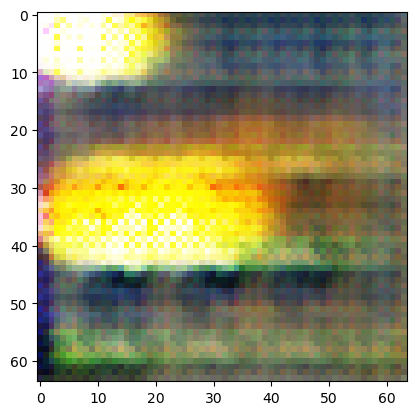

In [73]:
model.eval()
img = (((model((torch.rand(1, 100) - 0.5) / 0.5)[0] + 1) / 2).clamp(0, 1)).detach().numpy().transpose(1, 2, 0)
plt.imshow(img)